In [8]:
import dash 
import dash_core_components as dcc 
import dash_html_components as html 
from dash.dependencies import Input, Output 
import plotly.express as px 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tahmi\AppData\Local\Temp\ipykernel_18524\3795461320.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\tahmi\AppData\Local\Temp\ipykernel_18524\3795461320.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [9]:
fire = pd.read_csv('forestfires.csv')
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
#Add Farenheight temperature column since we already have temp column, but is recorded
#As Celcius

fire['Temp_Farenheit'] = fire['temp'].apply(lambda x: (x* 9/5) + 32)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Temp_Farenheit
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,46.76
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,64.40
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,58.28
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,46.94
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,52.52


In [14]:
#Add column where farenheight must be at certain temperature for a High/low fire warning

fire['Fire Warning'] = fire['Temp_Farenheit'].apply(lambda x: 'High' if x > 65 else 'Low')
fire.head() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Temp_Farenheit,Fire Warning
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,46.76,Low
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,64.40,Low
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,58.28,Low
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,46.94,Low
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,52.52,Low


In [16]:
#I want to sort the values via ISI

fire_sorted_isi = fire.sort_values(by='ISI', ascending=False)
print(fire_sorted_isi.head())

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
22   7  4   jun  sun  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0   0.00   
266  6  5   aug  tue  94.3  131.7  607.1  22.7  19.4  55   4.0   0.0   0.17   
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.00   
485  2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28   3.6   0.0   2.07   
206  2  2   aug  sat  93.5  139.4  594.2  20.3  22.9  31   7.2   0.0  15.45   

     Temp_Farenheit Fire Warning  
22            69.80         High  
266           66.92         High  
11            66.74         High  
485           87.08         High  
206           73.22         High  


In [26]:
#This is going to be updated version of my dataset by which I will do visualizations on
fire_sorted_isi.to_csv('forestfires_updated.csv', index=False)

In [18]:
fire = pd.read_csv('forestfires_updated.csv')
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Temp_Farenheit,Fire Warning
0,7,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00,69.80,High
1,6,5,aug,tue,94.3,131.7,607.1,22.7,19.4,55,4.0,0.0,0.17,66.92,High
2,7,5,sep,sat,92.8,73.2,713.0,22.6,19.3,38,4.0,0.0,0.00,66.74,High
3,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07,87.08,High
4,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45,73.22,High


In [20]:
#Lets perform more data wrangling with that updated dataset

#Filter this version 1 updated dataset where it only shows rows with High Fire Warnings

filtered_fire = fire[fire['Fire Warning'] == 'High'] 
print(filtered_fire)

#Then #Average the DC, DMC, and FFMC Columns, but groupby them Days. Most likely creating 3 new columns
average_DC = fire.groupby('day')['DC'].mean().reset_index() 
average_DC.rename(columns={'DC': 'average_DC'}, inplace=True) 
print(average_DC)
average_DMC = fire.groupby('day')['DMC'].mean().reset_index() 
average_DMC.rename(columns={'DMC': 'average_DMC'}, inplace=True) 
print(average_DMC)
average_FFMC = fire.groupby('day')['FFMC'].mean().reset_index() 
average_FFMC.rename(columns={'FFMC': 'average_FFMC'}, inplace=True) 
print(average_FFMC)

frequency_table = fire['Y'].value_counts() # Display the frequency table 
print(frequency_table)

frequency_table = fire['Y'].value_counts() # Display the frequency table 
print(frequency_table)



     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  4   jun  sun  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0   0.00   
1    6  5   aug  tue  94.3  131.7  607.1  22.7  19.4  55   4.0   0.0   0.17   
2    7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.00   
3    2  4   aug  mon  95.0  135.5  596.3  21.3  30.6  28   3.6   0.0   2.07   
4    2  2   aug  sat  93.5  139.4  594.2  20.3  22.9  31   7.2   0.0  15.45   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
502  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
503  8  6   aug  sun  81.6   56.7  665.6   1.9  27.8  35   2.7   0.0   0.00   
504  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
508  4  4   jul  tue  79.5   60.6  366.7   1.5  23.3  37   3.1   0.0   0.00   
510  2  4   sep  mon  63.5   70.8  665.3   0.8  22.6  38   3.6   0.0  11.32   

     Temp_Farenheit Fire Warning  
0             69

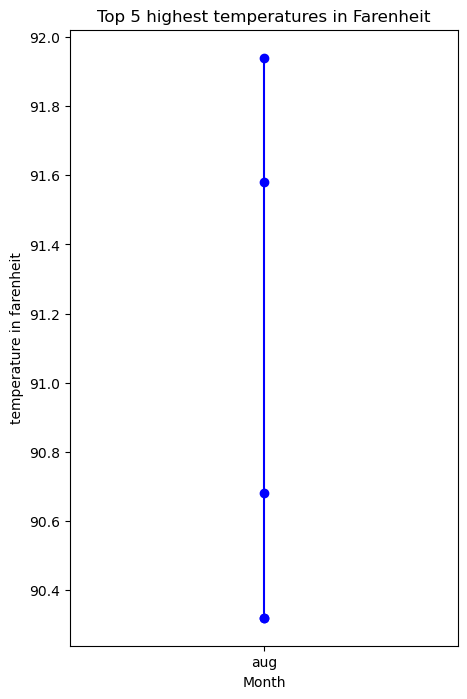

In [22]:
#Make a vertical line chart that displays top 5 highest temperatures in farenheit reguardless what 
#Month(s) is recorded from

top_5 = fire.nlargest(5, 'Temp_Farenheit')[['month', 'Temp_Farenheit']]

plt.figure(figsize=(5, 8))
plt.plot(top_5['month'], top_5['Temp_Farenheit'], color='blue',marker='o')
plt.title('Top 5 highest temperatures in Farenheit')
plt.xlabel('Month')
plt.ylabel('temperature in farenheit')
plt.show()



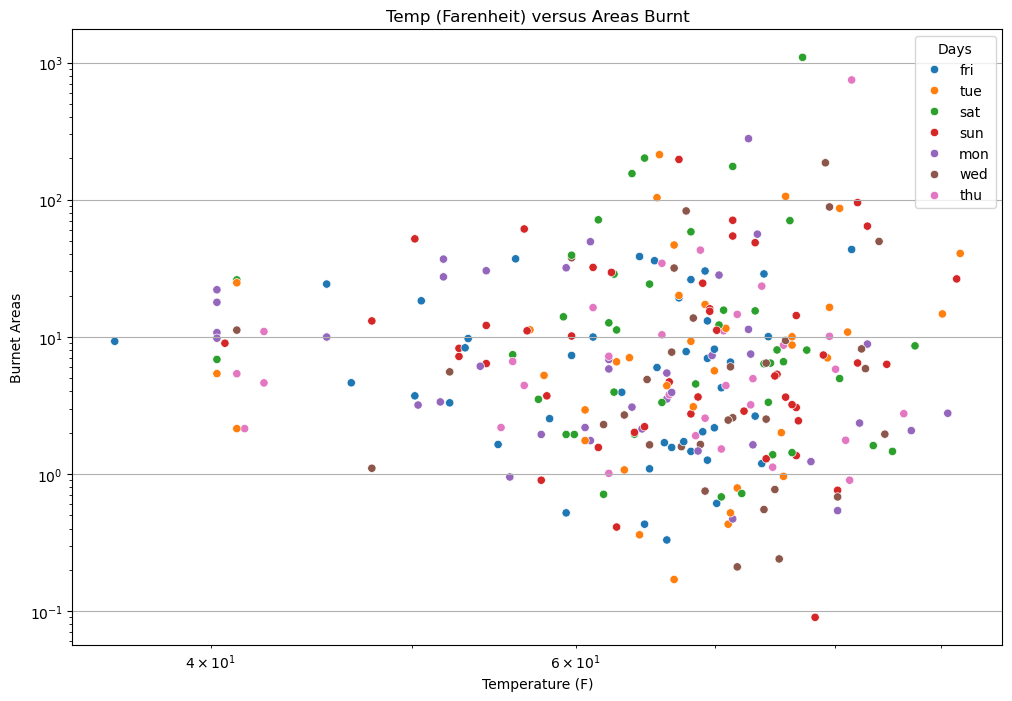

In [12]:
# Create the scatter plot that compares Temparature in Farenheit and Burnt Area
# Color the plot based on Months


plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=fire, x='Temp_Farenheit', y='area', hue='day')
plt.title('Temp (Farenheit) versus Areas Burnt')
plt.xlabel('Temperature (F)')
plt.ylabel('Burnet Areas') 
plt.xscale('log')
plt.yscale('log') 
plt.grid(True)
plt.legend(title='Days')
plt.show()

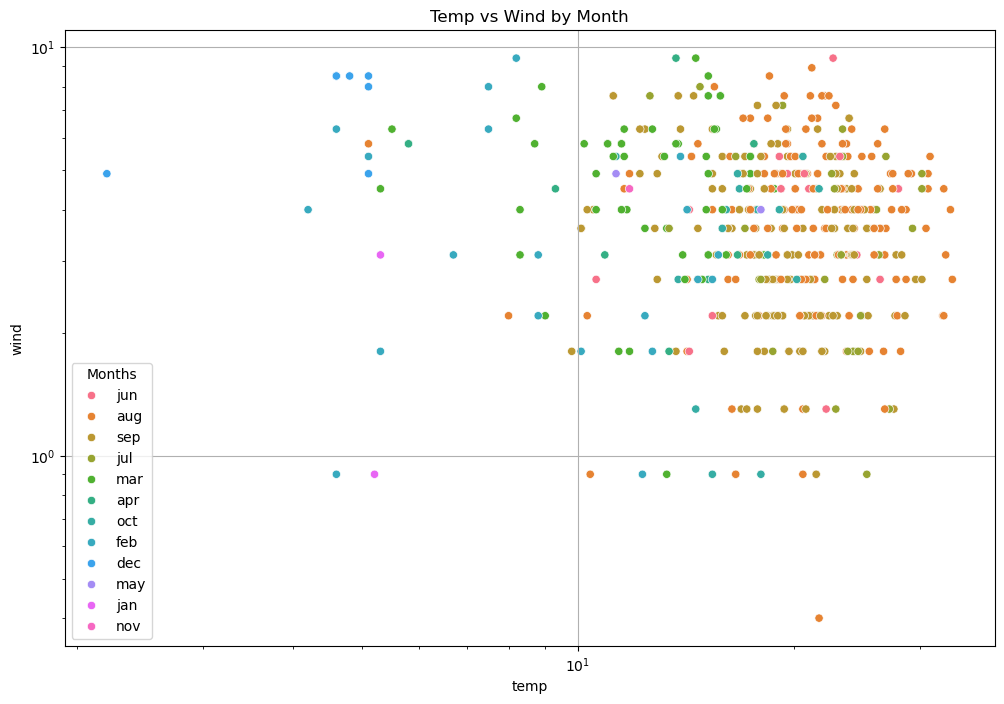

In [81]:
# Create the scatter plot that compares Temparature in Celsius and Wind Speed
# Color the plot based on Months

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=fire, x='temp', y='wind', hue='month')
plt.title('Temp vs Wind by Month')
plt.xlabel('temp')
plt.ylabel('wind')
plt.xscale('log')
plt.yscale('log') 
plt.grid(True)
plt.legend(title='Months')
plt.show()


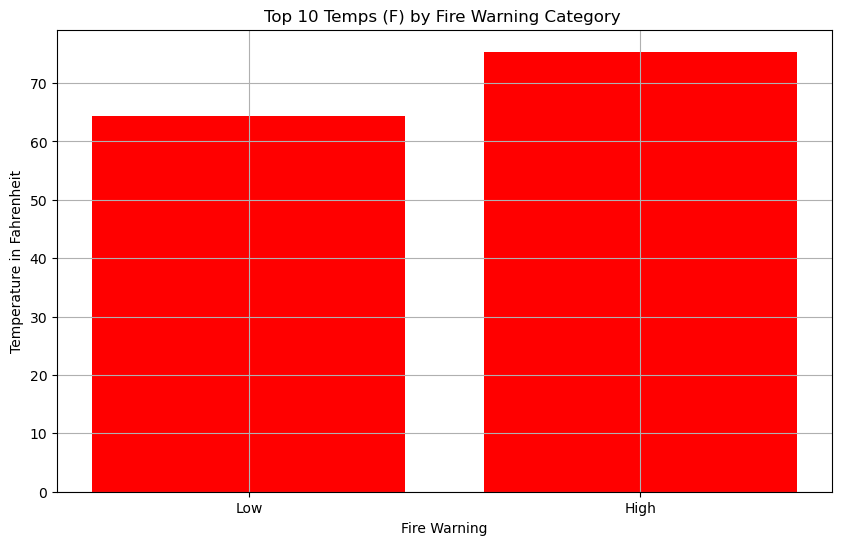

In [18]:
#Present a Barchart presenting 10 records of Temparature in Farenheit each based on
#High and Low Fire Warnings
fire_top_10 = fire.head(10) # Create a bar chart 
plt.figure(figsize=(10, 6)) 
plt.bar(fire_top_10['Fire Warning'], fire_top_10['Temp_Farenheit'], color='red')
plt.title('Top 10 Temps (F) by Fire Warning Category ') 
plt.xlabel('Fire Warning') 
plt.ylabel('Temperature in Fahrenheit') 
plt.grid(True) 
plt.show()

C:\Users\tahmi\AppData\Local\Temp\ipykernel_13248\254657959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fire, x='FFMC', y='DC', palette='Set1')


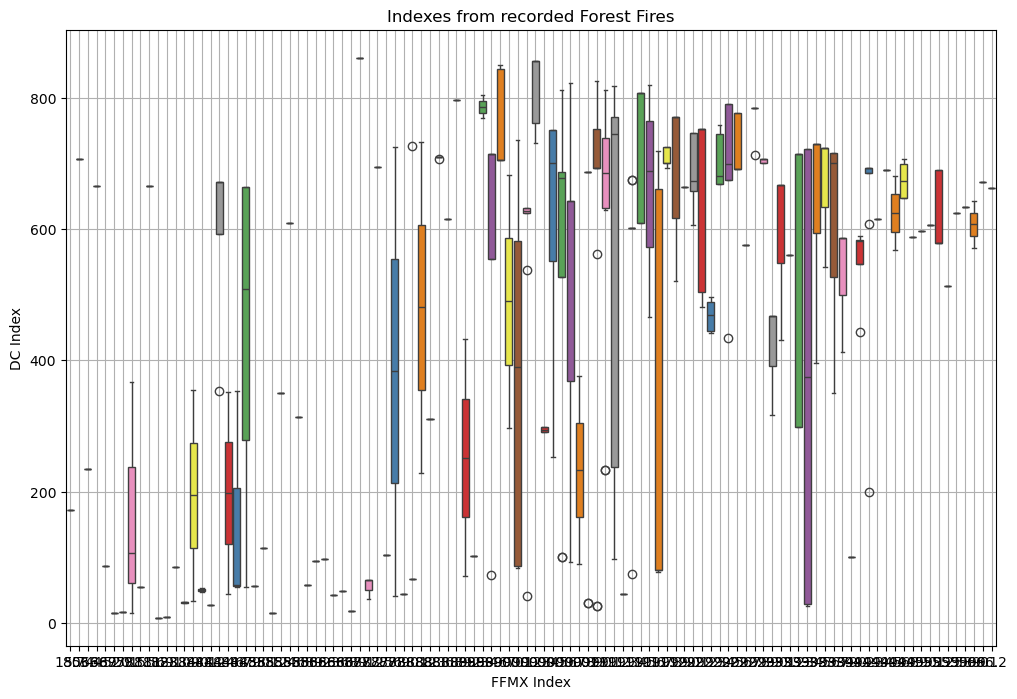

In [26]:
#Present a box plot comparing FFMC Index to DC Index 

plt.figure(figsize=(12, 8))
sns.boxplot(data=fire, x='FFMC', y='DC', palette='Set1')
plt.title('Indexes from recorded Forest Fires')
plt.xlabel('FFMX Index')
plt.ylabel('DC Index')
plt.grid(True)
plt.show()

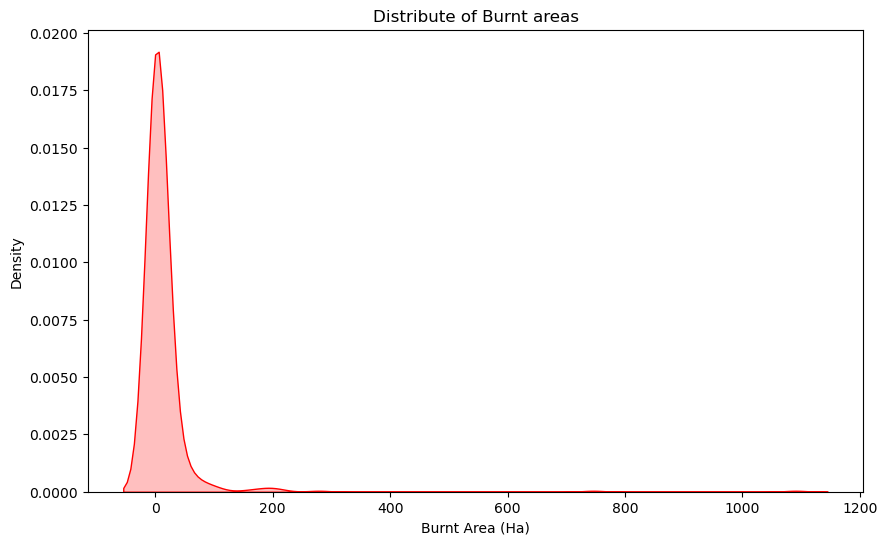

In [30]:
#Create a Density Plot based on Burned Area measured

plt.figure(figsize=(10, 6)) 
sns.kdeplot(data=fire, x='area', fill=True, color='red')
plt.title('Distribute of Burnt areas') 
plt.xlabel('Burnt Area (Ha)')
plt.ylabel('Density')
plt.show()

In [76]:
#Dashboard depicting length of Area being burnt throughout temperature in Fahrenheit throughout a given month 

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Temperature (C) and Burned Area"),
    dcc.Dropdown(
        id='Month',
        options=[{'label': month, 'value': month} for month in fire['month'].unique()],
        value='jan',
        multi=False
    ),
    dcc.Graph(id='scatter-plot')
])

# Callback to update scatter plot based on selected month
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('Month', 'value')]
)
def update_scatter_plot(selected_month):
    filtered_df = fire[fire['month'] == selected_month]
    fig = px.scatter(filtered_df, x='temp', y='area', 
                     title=f'Burned Area in Temperature (C) during {selected_month}',
                     labels={'temp': 'Temperature (Celsius)', 'area': 'Burned Area (ha)'})
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [78]:
#Dashboard depicting Temperature in Farenheit due by Wind Speeds throughout a given month

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Temperature (F) and Wind Speed"),
    dcc.Dropdown(
        id='Month',
        options=[{'label': month, 'value': month} for month in fire['month'].unique()],
        value='jan',
        multi=False
    ),
    dcc.Graph(id='scatter-plot')
])

# Callback to update scatter plot based on selected month
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('Month', 'value')]
)
def update_scatter_plot(selected_month):
    filtered_df = fire[fire['month'] == selected_month]
    fig = px.scatter(filtered_df, x='Temp_Farenheit', y='wind', 
                     title=f'Temperature by Wind Speed in {selected_month}',
                     labels={'Temp_Farenheit': 'Temperature (Farenheit)', 'wind': 'Wind Speed (km/h)'})
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
